# Assignment 3



Same instructions as past assignments.

This assignment involves a small amount of work to modify the code provided below.  You can download a "jupyter-notebook"  using the download link at the top.  Alternately you can use the 'rocket' icon at the top to open it in Binder or in your browser.  Be careful opening in your browser as it will quit if you leave it idle too long.



1. Consider an infectious disease which has recently been introduced into a very large population from wildlife.  It is believed that the offspring distribution can be well-approximated by a Negative-Binomial distribution of unknown parameters.  There have been five known independent introductions into the population.  So far all outbreaks have died out, but there is concern that the reproduction number (the mean of the offspring distribution) may be larger than $1$.  We will use the parametrization of the Negative Binomial distribution from {prf:ref}`example-NegBinPGF`.

   **(a)** Find the probability of an outbreak of size $L$ for a given $p$ and $r$ ($r$ may not be an integer).  Your expression should be given in terms of the Gamma function $\Gamma(x)$ --- replace all factorials $M!$ with $\Gamma(M+1)$.  It will be helpful to observe that if $\mu_{r,p}(x)$ is the PGF of the distribution, then $\mu_{r,p}(x)^N$ is the PGF for another Negative Binomial distribution.

   **(b)** Find a reasonably simplified formula for the probability that $M$ outbreaks have sizes $L_1$, $L_2$, $\ldots$, $L_M$ for given parameters $p$ and $r$ (expressed in terms of Gamma functions)
   
   The probability of observing data for a given set of parameters is called the *likelihood* of the parameters.  The *log-likelihood* is the logarithm of the likelihood.  The parameters that maximize the likelihood will also maximize the log-likelihood, but maximization is often easier with log-likelihood, and also much easier to use computationally.  In Python, we can calculate $\ln \Gamma(x)$ using 

   ```
   from scipy.special import gammaln  #put this at the top

   gammaln(x)
   ```
   
   **(c)** Find the log-likelihood of $p$ and $r$ given $L_1, \ldots, L_M$.

   **(d)** Using $A = \sum L_i$, find a function $\hat{p}(r)$ that maximizes the likelihood given $r$.

   **(e)** Write down a function in terms of only $r$ to maximize to find $(p^*,r^*)$ that maximizes the likelihood.  Remove any terms that do not depend on $r$.
   

   **(f)** One way to estimate paramters is "Maximum Likelihood Estimation" (MLE).  We simply find the parameters that have the highest likelihood.  

   The following code simulates `numsims`$=5$ outbreaks with a negative binomial offspring distribution having $r=1$, $p=0.6$.  Then it uses maximum likelihood estimation to estimate $r$ and $p$.  

   - Using your answers above, modify `Function_to_maximize` so that it performs the correct calculation.  Also modify the expression for `p_est`.  Run the code.

   - Play around with `numsims` to get an idea of how many simulations are needed for this to perform well at estimating the parameters.  Also play around with $p$ and $r$ (the code will insist that the simulations be guaraneed to finish, so it will refuse to run if $\mathcal{R}_0=\mu'(1)=(1-p)r/p>1$.).  

   - Looking at the plot of $p_k$, the offspring distribution, comment on whether $p$ and $r$ need to be known exactly to make good predictions.

    Reflect on your observations.  What happens if `numsims` is small?  What if $\mathcal{R}_0$ is close to 1?
   




[3, 1, 6, 2, 1]
student created function is needed here, using default
student created function is needed here, using default
Estimated r: 5.064601742789742e-06
Estimated p: 2


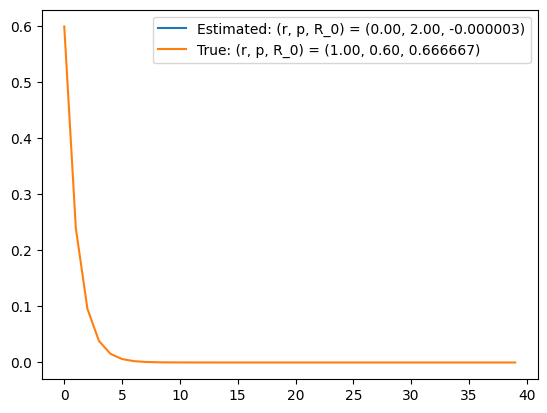

In [ ]:
import numpy as np
from scipy.special import gammaln
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

r = 1
p = 0.6
numsims = 5

if    (1-p)*r/p >= 1:
    raise ValueError("Warning: mean must be less than 1 for extinction to be certain")


L=[]
for counter in range(numsims):
    X = 1
    cumulative = X
    while X>0:
        newX = 0
        for i in range(X):
            U = np.random.negative_binomial(r,p)
            cumulative += U
            newX += U
        X = newX
    L.append(cumulative)


print("observed sizes: ", L)
L = np.array(L)
A = L.sum()



print("student-created function is needed here, using default")
def F_to_maximize(r):
    return 2-r**2#You need to fill in the correct expression here.




def F_to_minimize(r):
    return -F_to_maximize(r)


res = minimize_scalar(F_to_minimize, bounds=(1e-8, 1e6), method="bounded")

r_est = res.x

print("student-created function is needed here, using default")
p_est = 2  #fill in correct expression here

print("Estimated r:", r_est)
print("Estimated p:", p_est)

from scipy.stats import nbinom
plt.figure()
n = np.arange(0, 40)
plt.plot(n, nbinom.pmf(n, r_est, p_est ), label="Estimated: (r, p, R_0) = (%.2f, %.2f, %.6f)"%(r_est,p_est, (1-p_est)*r_est/p_est))
plt.plot(n, nbinom.pmf(n, r, p ), label="True: (r, p, R_0) = (%.2f, %.2f, %.6f)"%(r,p, (1-p)*r/p))
plt.legend()
plt.xlabel('offspring number')
plt.ylabel('probability mass function')
plt.show()

2. The code below performs `numsims` simulations of SIR disease in a population of $N=10$ individuals, assuming a negative-binomial offspring distribution with $r=1$, $p=0.3$.  It plots a histogram of the resulting outbreak sizes.  Let $q_\ell$ be the probability of size $\ell$.

   **(a)** The values $q_1$, $\ldots$, $q_N$ satisfy a system of $N$ equations of the form

   $$
   1 = \sum_{\ell=1}^M c_{M,\ell} q_\ell
   $$
   For this offspring distribution, write down what $c_{M,\ell}$ is.  

   **(b)** The example in the text used a relatively sophisticated method to calculate $q_\ell$ because of error accumulation for very small values of $q_\ell$.  However, this smaller population does not have such issues.  A simpler matrix solver is used here.  Enter your expression into the code below into `c_formula`, which will be used to create the matrix.  Then it uses the `linalg` basic solve to solve the matrix equation $C \vec{q} = \vec{1}$.  Confirm that the solution matches the simulations.

   **(c)** Briefly discuss how one could use this approach and Maximum Likelihood Estimation to infer $p$ and $r$ given some observed outbreaks in several small closed populations.



student created function is needed here, using default


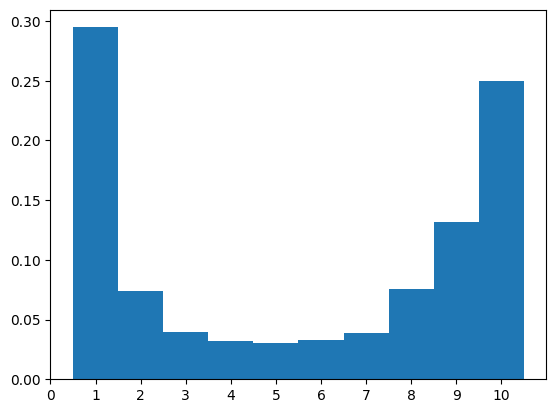

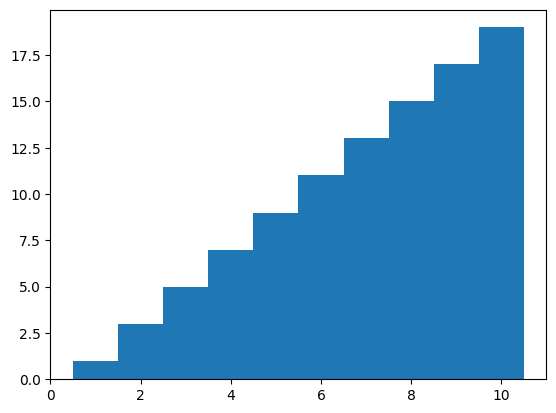

In [ ]:
import numpy as np
from scipy.special import gammaln
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

rng = np.random.default_rng()
r = 1
p = 0.3
N=10

numsims = 5000

L=[]
for counter in range(numsims):
    X = 1
    S = N-X
    cumulative = X
    while X>0:
        newX = 0
        for i in range(X):
            U = rng.negative_binomial(r,p)
            for _ in range(U):
                if rng.random() < S/(N-1):
                    S -= 1
                    newX += 1
        cumulative += newX
        X = newX
    L.append(cumulative)

L = np.array(L)
A = L.sum()
bins = np.arange(0.5, N+1, 1)
plt.hist(L, bins = bins, density=True,)
plt.xticks(np.arange(0, N+1, 1))
plt.xlabel('total outbreak size')
plt.ylabel('probability mass function')



print("student created function is needed here, using default")
def c_formula(N, M, ell,):
    """
    Student-defined formula for c_{M, ell}.
    Replace this with the desired expression.
    """
    if ell <= M:
        return 1/M**2
    else: 
        return 0


# Build lower-triangular matrix
C = np.zeros((N, N), dtype=float)

for M in range(1, N+1):
    for ell in range(1, M+1):
        C[M-1, ell-1] = c_formula(N, M, ell)

# Right-hand side
b = np.ones(N)

# Solve C q = b
q = np.linalg.solve(C, b)


x = np.arange(1, N + 1)
#plt.plot(ell, q)
plt.figure()
plt.bar(x, q, width=1.0, align= 'center')
plt.xlabel('total outbreak size - predicted')
plt.ylabel('probability mass function - predicted')
plt.show()

3. Consider the Till model of stem cells with some $p_0$ and $p_2=1-p_0$.

   **(a)** Compare this to the infectious-disease model in continuous-time.  Explain why this is analagous and use the results we have about the continuous-time infectious disease model to calculate the probability that the Till model comes to completion with exactly $\ell$ differentiated cells (and zero stem cells) in terms of $p_0$ and $p_2$.  It will help if you make the offspring distribution PGFs identical and use this to determine $\mathcal{R}_0=\beta/\gamma$ and $1+\mathcal{R}_0$ in terms of $p_0$ and $p_2$.

   *Now we will explore an alternate way to derive the final size that does not depend on the Cycle Lemma proof.*
 
   *Let $\Phi_g(x,y)$ be the PGF for the number of stem cells and differentiated cells at generation $g$.  Assume that differentiated cells persist for each generation (or equivalently, that at each generation they are replaced by an identical differentiated cell).*  

   **(b)** Find the PGF of the offspring distribution for both stem cells and differentiated cells.

   **(c)** Using the backward Kolmogorov approach, derive a recursive formula for $\Phi_g(x,y)$.

   **(d)** What information is contained in the coefficients of the function $\omega_g(y) = \Phi_g(0,y)$?  

   **(e)** What recursive relation does $\omega_g(y)$ solve?  Assume $\omega_g(y) \to \omega(y)$ converges as $g \to \infty$.  What quadratic (in $\omega$) equation does the recursive relation become in this limit?

   **(f)** Solve the quadratic equation for $\omega(y)$.  There should be two options.  Based on our knowledge of the system, what is $\omega(0)$?  Use this to choose the correct result.  Your result should have a $\sqrt{1-4p_0p_2y}$ in it,

   **(g)** Write out the first 4 terms of $(1-4p_0p_2y)^{1/2}$ using the binomial theorem (for non-integer exponents):

   $$
   (a+b)^r = a^r + ra^{r-1}b + \frac{r(r-1)}{2!} a^{r-2}b^2  + \frac{r(r-1)(r-2)}{3!} a^{r-3}b^3 + \cdots
   $$
   I don't see a quick way for me to guide you to the form of the general coefficient, but if you can find it, that would be useful.

   **(h)** Use this to write out the first 3 terms of the expansion for $\omega(y)$.  Verify that they agree with the result calculated in **(a)**.


4. Consider a continuous-time version of the Macken-Perelson model.  Assume stem cells divide with rate $r_s$ and the mast cells divide with rate $r_m$.  Assume the system begins with a single stem cell.  Let $\Phi(x,y,z,t)$ be the PGF for the number of each type at time $t$.

   **(a)** Derive a backward Kolmogorov equation for $\Phi(x,y,z,t)$

   **(b)** Derive a forward Kolmogorov equation for $\Phi(x,y,z,t)$.

   **(c)** How can we interpret $\Phi(0,0,1,t)$?  Use one of the Kolmogorov equations to write down an ordinary differential equation (that is, just $t$ derivatives) that we can use to solve for this.  What is the appropriate initial condition?

5. Write a 1+ page summary of one of the following papers.  

- Explain the basic problem the researchers are studying.
- What did the PGF in the paper represent?
- Explain the equations governing their PGF (how did they determine how it changes in time?  What is its initial condition?)
- How did they use it to analyze their problem?  
- What were their conclusions?

Here are the papers to choose from:

   - Fixation Probabilities When Generation Times Are Variable: The Burst–Death Model
   - Gestational mutations and carcinogenesis
   - Stochasticity, invasions, and branching random walks
   - Quantifying uncertainty in a predictive model for popularity dynamics
   - Superspreading and the effect of individual variation on disease emergence
   - Second look at the spread of epidemics on networks
   - https://arxiv.org/pdf/0707.0080
   - A generating function perspective on the transmission forest
   
   If there is a different paper you would like to study, please let me know.

   Many of these define a PGF in terms of $\mathbb{E}[x^S]$ where $S$ is a random (non-negative valued variable).  This may look unusual to you as I have not used that notation, but this is simply $\mathbb{E}[x^S] = \sum_k \mathbb{P}[S=k] x^k = \sum_k p_k x^k$.